In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (13, 10)

sns.set(style="whitegrid")

In [2]:
auctions = pd.read_csv("auctions.csv", dtype={"platform":"int8", "ref_type_id":"int8", "source_id":"int8"})

In [33]:
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")
auctions["date"] = auctions['date'].dt.tz_localize("UTC").dt.tz_convert('America/Argentina/Cordoba').dt.tz_localize(None)
#En Argentina usamos GMT-3 al igual que en Uruguay

In [4]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


## ¿Cuántas subastas se registraron por día?

In [36]:
auctions["cantidad_subastas"] = 1
auctions["fecha"] = auctions["date"].dt.date

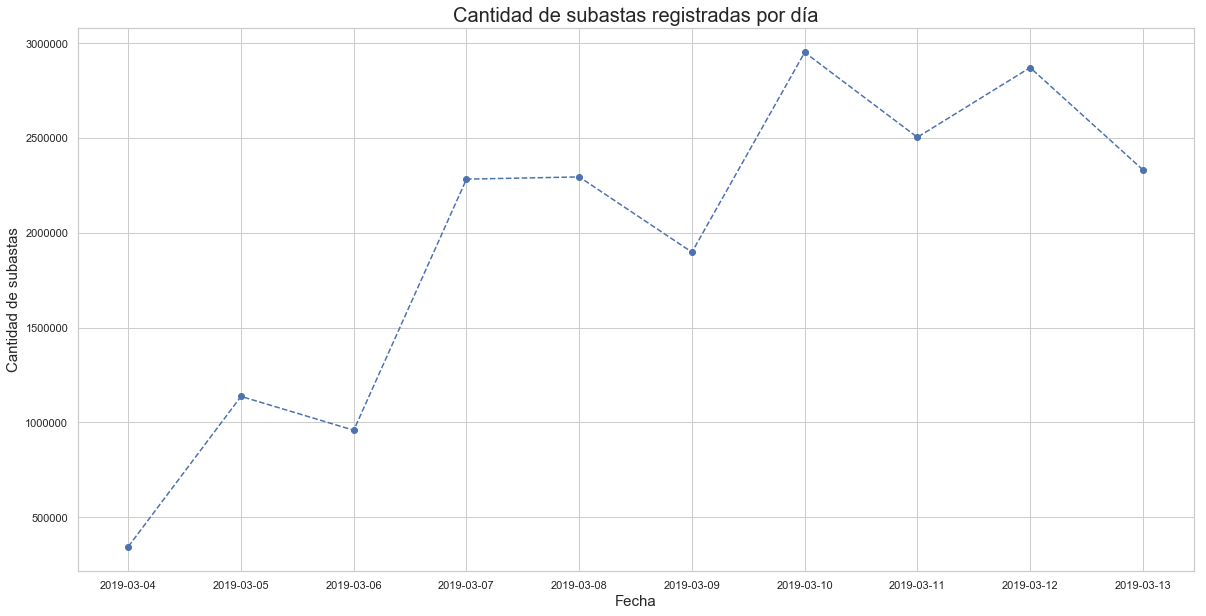

In [179]:
plot = auctions.groupby('fecha').agg({'cantidad_subastas': 'count'}).plot(figsize=(20,10), style = 'o--', legend = False);
plot.set_ylabel("Cantidad de subastas", fontsize = 15)
plot.set_xlabel("Fecha", fontsize = 15)
plot.set_title("Cantidad de subastas registradas por día", fontsize = 20)

plt.savefig("subasta_reg_por_dia.png", dpi = 300)

## ¿Cuál de las dos plataformas registró más subastas por día?

In [162]:
df_to_plot = auctions.groupby(["fecha", "platform"]).agg({"cantidad_subastas":"count"})

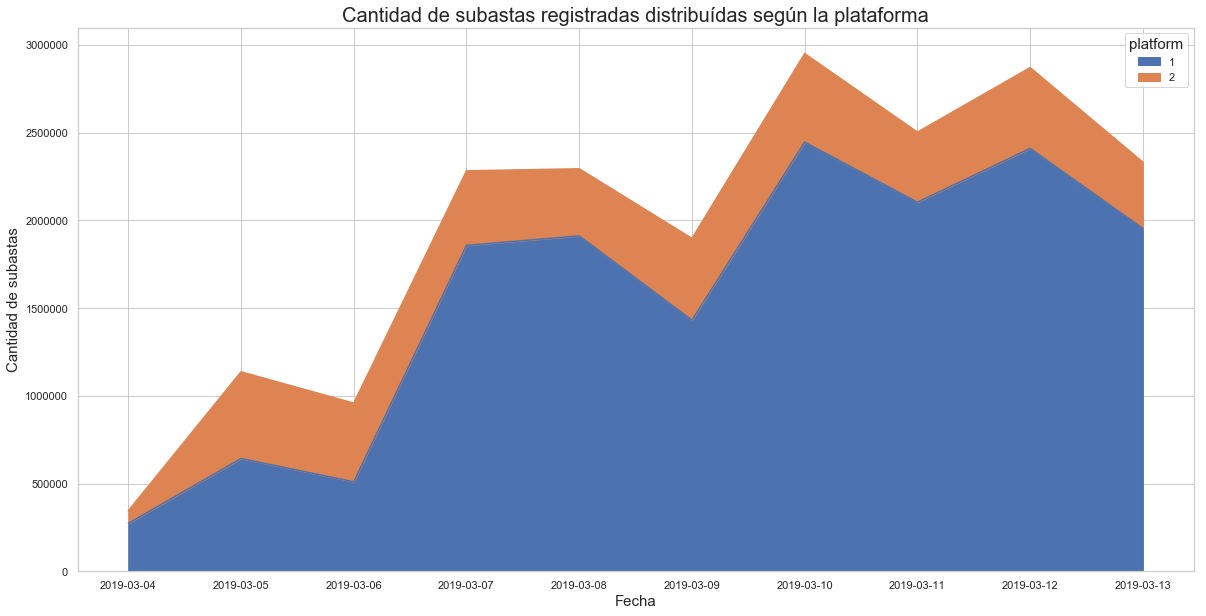

In [180]:
plot_b = df_to_plot.unstack().cantidad_subastas.plot.area(figsize = (20,10))
plot_b.set_ylabel("Cantidad de subastas", fontsize = 15)
plot_b.set_xlabel("Fecha", fontsize = 15)
plot_b.set_title("Cantidad de subastas registradas distribuídas según la plataforma", fontsize = 20)

plt.savefig("area_platform_subastas.png", dpi = 300)

## ¿Cuál fue la relación en la participación en subastas de dispositivos iOS y Android?

In [84]:
group_platform = auctions.groupby('platform').agg({'cantidad_subastas':'count'})

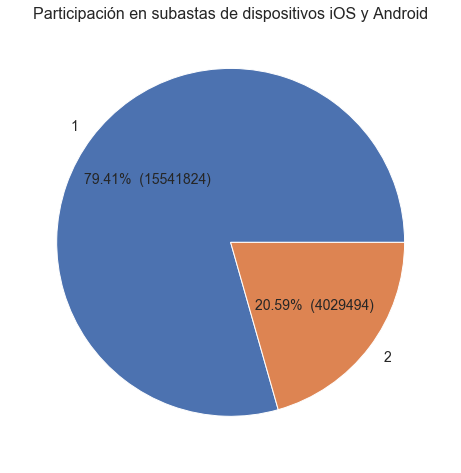

In [174]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['font.size'] = 15

plt.figure(figsize=(8,8))
plt.title("Participación en subastas de dispositivos iOS y Android", loc = 'center', fontsize = 16)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig = plt.pie(group_platform['cantidad_subastas'], labels= [1,2], labeldistance = 1.1, textprops={'fontsize': 14},\
              autopct=make_autopct(group_platform['cantidad_subastas']))

plt.savefig('asd.png', dpi = 300)


In [4]:
# auctions_sorted = auctions.loc[:, ["device_id","date"]].sort_values(["device_id","date"])

In [5]:
""" def calcular_reapariciones_usuarios(df):
    
    lista = [0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    last_device_id = auctions_sorted.reset_index().loc[0].values[1]
    last_date = auctions_sorted.reset_index().loc[0].values[2]
    for a,row in df.iterrows():
        
        device_id = row["device_id"]
        date_act = row['date']
            
        if device_id != last_device_id:
            last_device_id = device_id
            last_date = date_act
            continue
        
        dif = ((date_act - last_date).seconds)/3600    #es la diferencia en horas del date actual con el date anterior
        dif_round = round(dif,0) #se redondea la diferencia
            
        if dif_round <= 12:
            lista[dif_round] += 1
            
        last_date = date_act       
        
    return lista """

In [6]:
#reapariciones = calcular_reapariciones_usuarios(auctions_sorted)

In [7]:
#data = {'tiempo_reap':  ['Menos de una hora','1h','2hs','3hs','4hs', '5hs', '6hs', '7hs', '8hs', '9hs', '10hs', '11hs', '12hs'],
        #'cant_ocurrencias': reapariciones }

# df = pd.DataFrame(data, columns = ['tiempo_reap','cant_ocurrencias'])

In [16]:
# df.to_csv("reapariciones_usuarios.csv", encoding='utf-8', index=False) Nos guardamos el df para evitar volver a correr el código en el notebook

## ¿Cuánto tiempo tardaron los usuarios en reaparecer en subastas?

In [9]:
df_users = pd.read_csv("reapariciones_usuarios.csv")

In [12]:
plt.rcParams['figure.figsize'] = (15, 8)

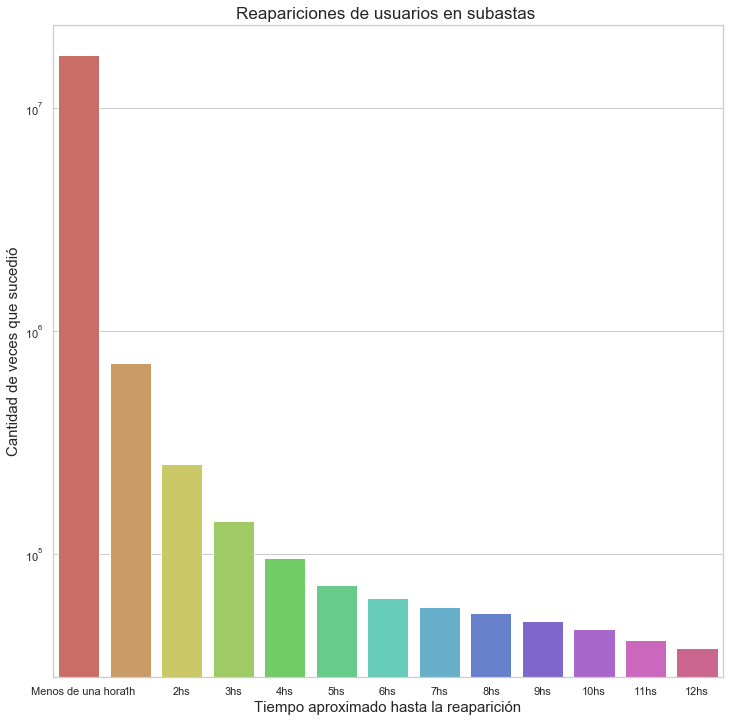

In [178]:
graph = sns.barplot(x= df_users['tiempo_reap'], y = df_users['cant_ocurrencias'], orient='v', palette="hls")
graph.set_xlabel("Tiempo aproximado hasta la reaparición", fontsize = 15)
graph.set_ylabel("Cantidad de veces que sucedió", fontsize = 15)
graph.set_title("Reapariciones de usuarios en subastas ", fontsize = 17)
graph.set_yscale('log')

plt.savefig("Reapariciones_usuarios_subastas.png", dpi = 300)

## ¿Cuántas subastas se produjeron por hora desde el 5 de Marzo al 13 de Marzo de 2019?

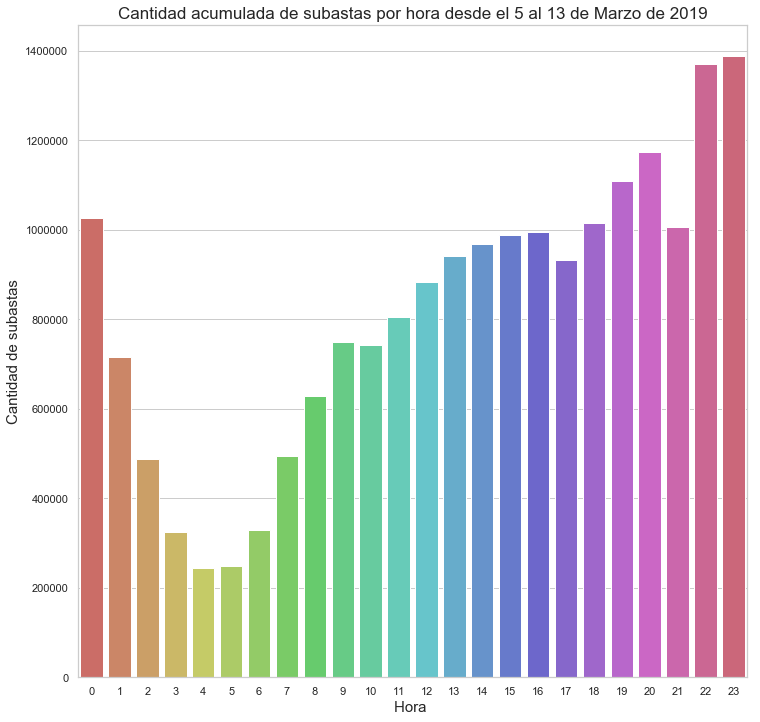

In [181]:
plt.rcParams['figure.figsize'] = (12, 12)

auctions['hora'] = auctions['date'].dt.hour

subastas_por_hora = auctions.groupby('hora').agg({'cantidad_subastas': 'count'}).reset_index().\
sort_values(by = 'cantidad_subastas', ascending = False)

graph_b = sns.barplot(x= subastas_por_hora['hora'], y = subastas_por_hora['cantidad_subastas'], orient='v', palette="hls")
graph_b.set_title("Cantidad acumulada de subastas por hora desde el 5 al 13 de Marzo de 2019", fontsize = 17)
graph_b.set_xlabel("Hora ", fontsize = 15)  #fontdict = font para cambiar la fuente
graph_b.set_ylabel("Cantidad de subastas", fontsize = 15)

plt.savefig("cant_acum_hora_subastas.png", dpi = 300)